In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
#import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error ,r2_score,mean_absolute_error
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
import time



In [2]:
df=pd.read_csv(r'C:\Users\pc\Documents\files.csv\Laptop Dataset.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
columns=df.columns
columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
df.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
for i in df:
    print(df[i].value_counts())

0.0       1
1285.0    1
757.0     1
1069.0    1
986.0     1
         ..
1061.0    1
728.0     1
637.0     1
904.0     1
1211.0    1
Name: Unnamed: 0, Length: 1273, dtype: int64
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
LG             3
Google         3
Fujitsu        2
Huawei         2
Name: Company, dtype: int64
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: TypeName, dtype: int64
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15        4
15.4      4
35.6      3
10.1      3
13        2
24        2
17        1
33.5      1
11.3      1
?         1
18.4      1
25.6      1
14.1      1
31.6      1

In [8]:
df.replace('?',np.NaN,inplace=True)
df['Inches']=df['Inches'].astype('float')
df['Ram']=df['Ram'].str[:-2]
df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].str[:-2]
df['Weight']=df['Weight'].astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1272 non-null   float64
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   int32  
 7   Memory            1272 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1272 non-null   float64
 11  Price             1273 non-null   float64
dtypes: float64(4), int32(1), object(7)
memory usage: 124.3+ KB


In [10]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

In [12]:
df1=df.copy()
df1=df.dropna()
#df1['Inches'].fillna(df['Inches'].mean(),inplace=True)
#df1['Weight'].fillna(df['Weight'].mean(),inplace=True)
#df1['Memory'].fillna(df['Memory'].mode()[0],inplace=True)

In [13]:
df1.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [14]:
df2=df1.copy()
df2=df1[['Company', 'TypeName', 'Inches', 
                       'ScreenResolution','Cpu', 'Ram', 
                       'Memory', 'Gpu', 'OpSys', 'Weight', 
                       'Price']]

In [15]:
columns=df2.columns
columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [16]:
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [17]:
df2.shape

(1270, 11)

In [18]:
df2.describe()

,Inches,Ram,Weight,Price
count,1270.000000,1270.00000,1270.000000,1270.000000
mean,15.131890,8.45748,2.077677,59886.072669
std,1.955256,5.56693,0.808377,37323.784300
min,10.100000,1.00000,0.000200,9270.720000
25%,14.000000,4.00000,1.500000,31914.720000
50%,15.600000,8.00000,2.040000,52054.560000
75%,15.600000,8.00000,2.320000,79303.816800
max,35.600000,64.00000,11.100000,324954.720000


<AxesSubplot:>

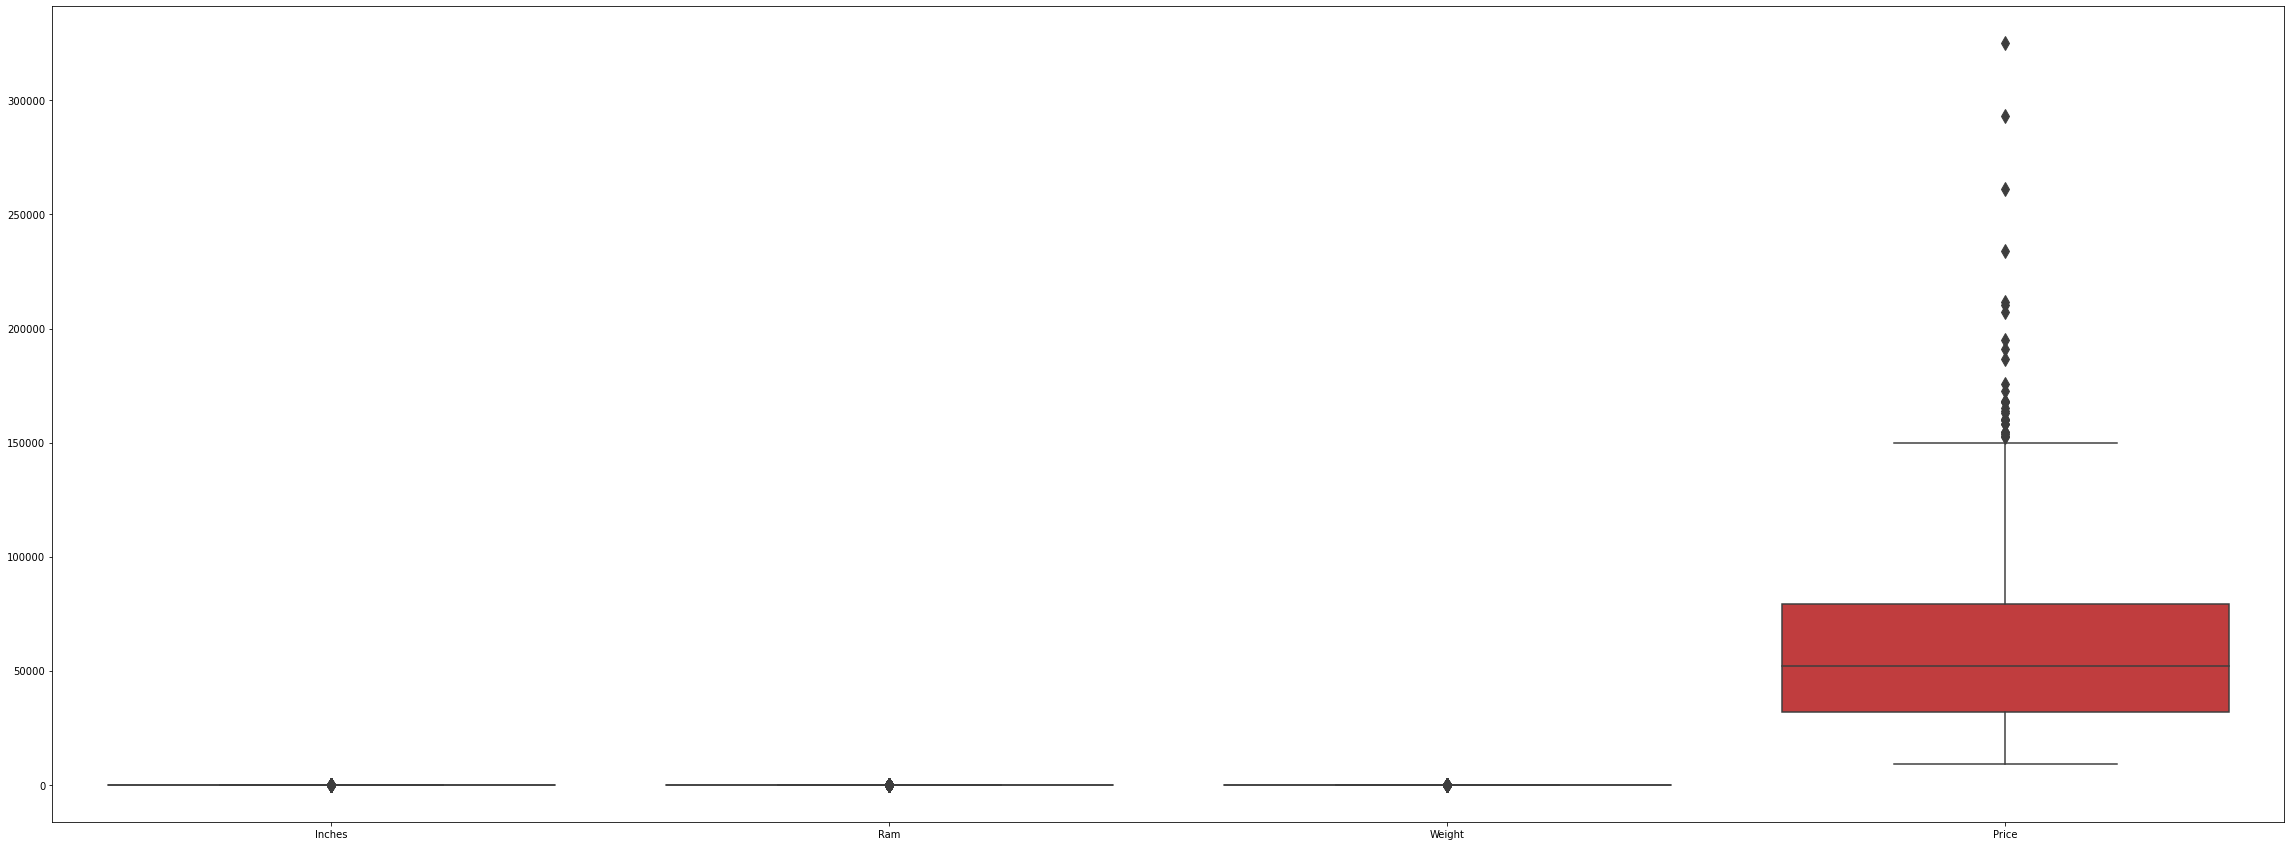

In [19]:
plt.figure(figsize=(40,15))
sns.boxplot(data=df2,fliersize=10)

<AxesSubplot:ylabel='Count'>

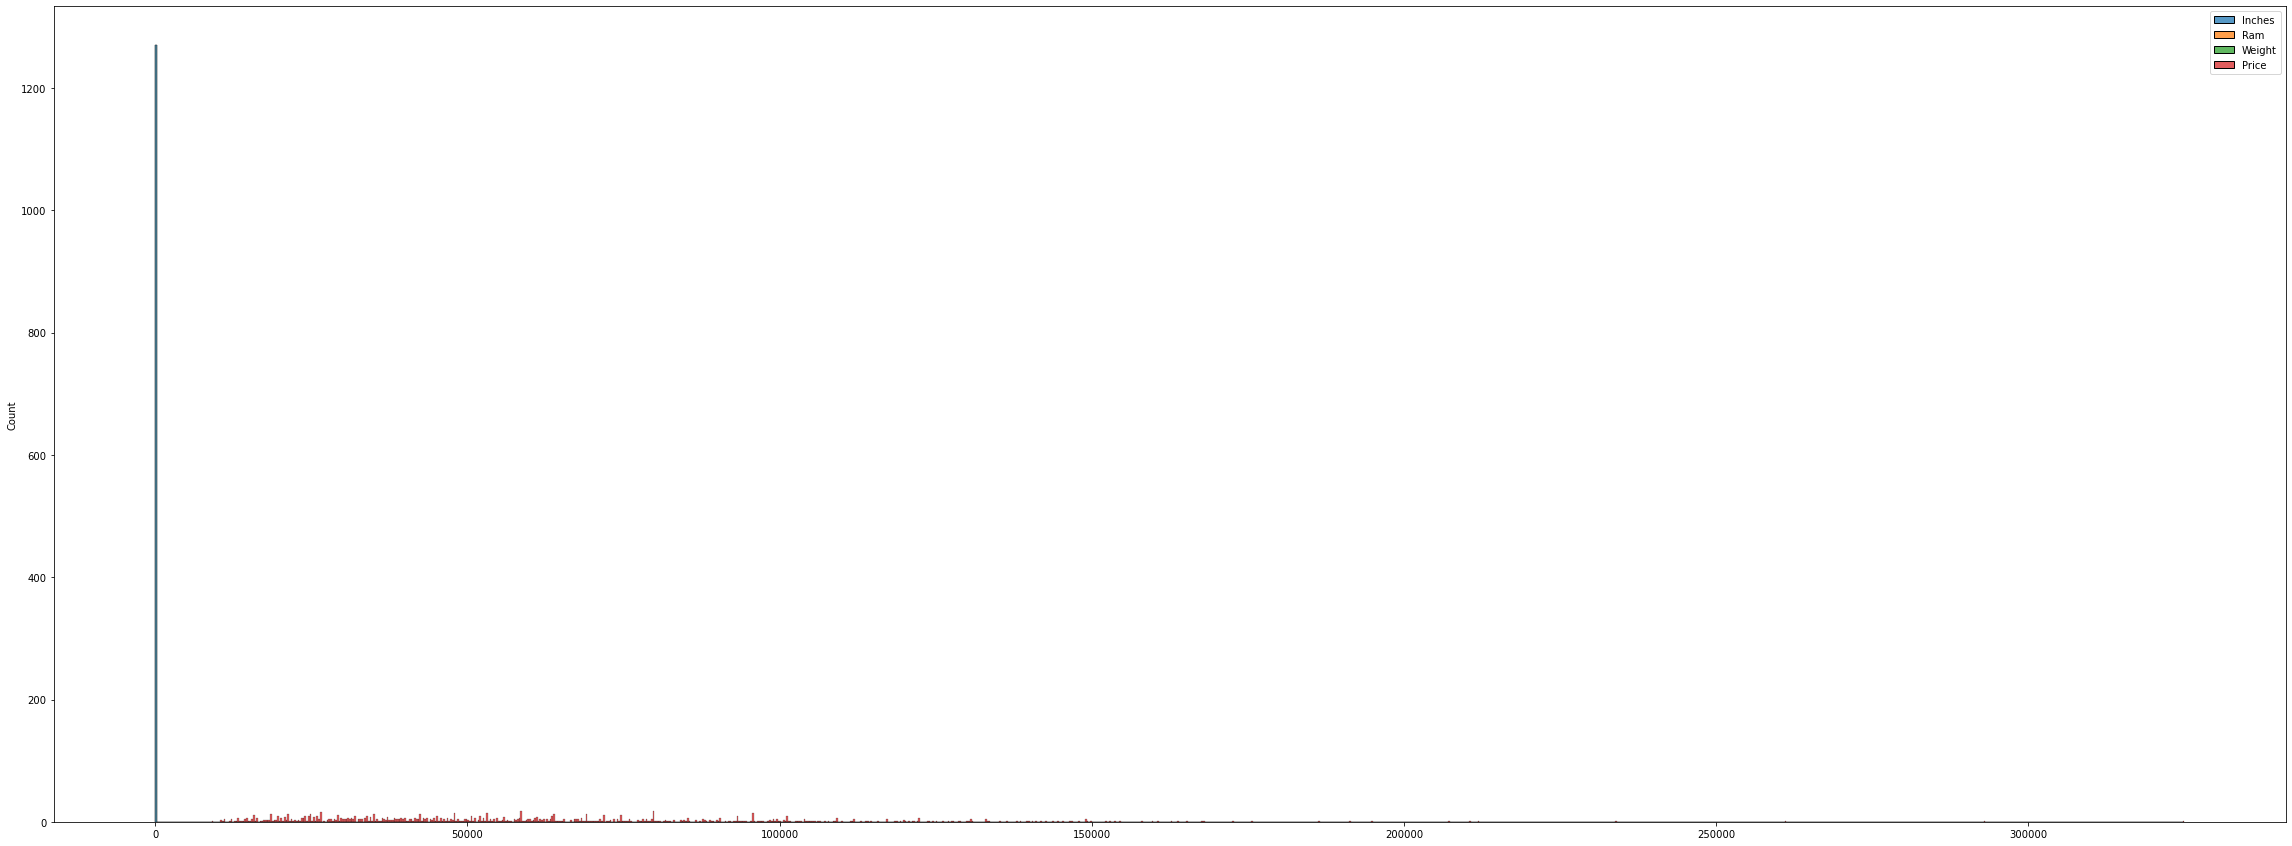

In [20]:
plt.figure(figsize=(40,15))
sns.histplot(data=df2)

In [21]:
Q3=df2['Price'].quantile(0.75)
Q1=df2['Price'].quantile(0.25)
IQR=Q3-Q1
print(IQR)

47389.0968


In [22]:
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)
print(upper,lower)

150387.462 -39168.9252


In [23]:
df3=df2.copy()
df3=df2[(df2['Price']>lower)&(df2['Price']<upper)]
print(df3['Price'].describe())

count      1242.000000
mean      57031.181832
std       31820.724320
min        9270.720000
25%       31844.257200
50%       50616.000000
75%       76026.031200
max      149916.600000
Name: Price, dtype: float64


<AxesSubplot:>

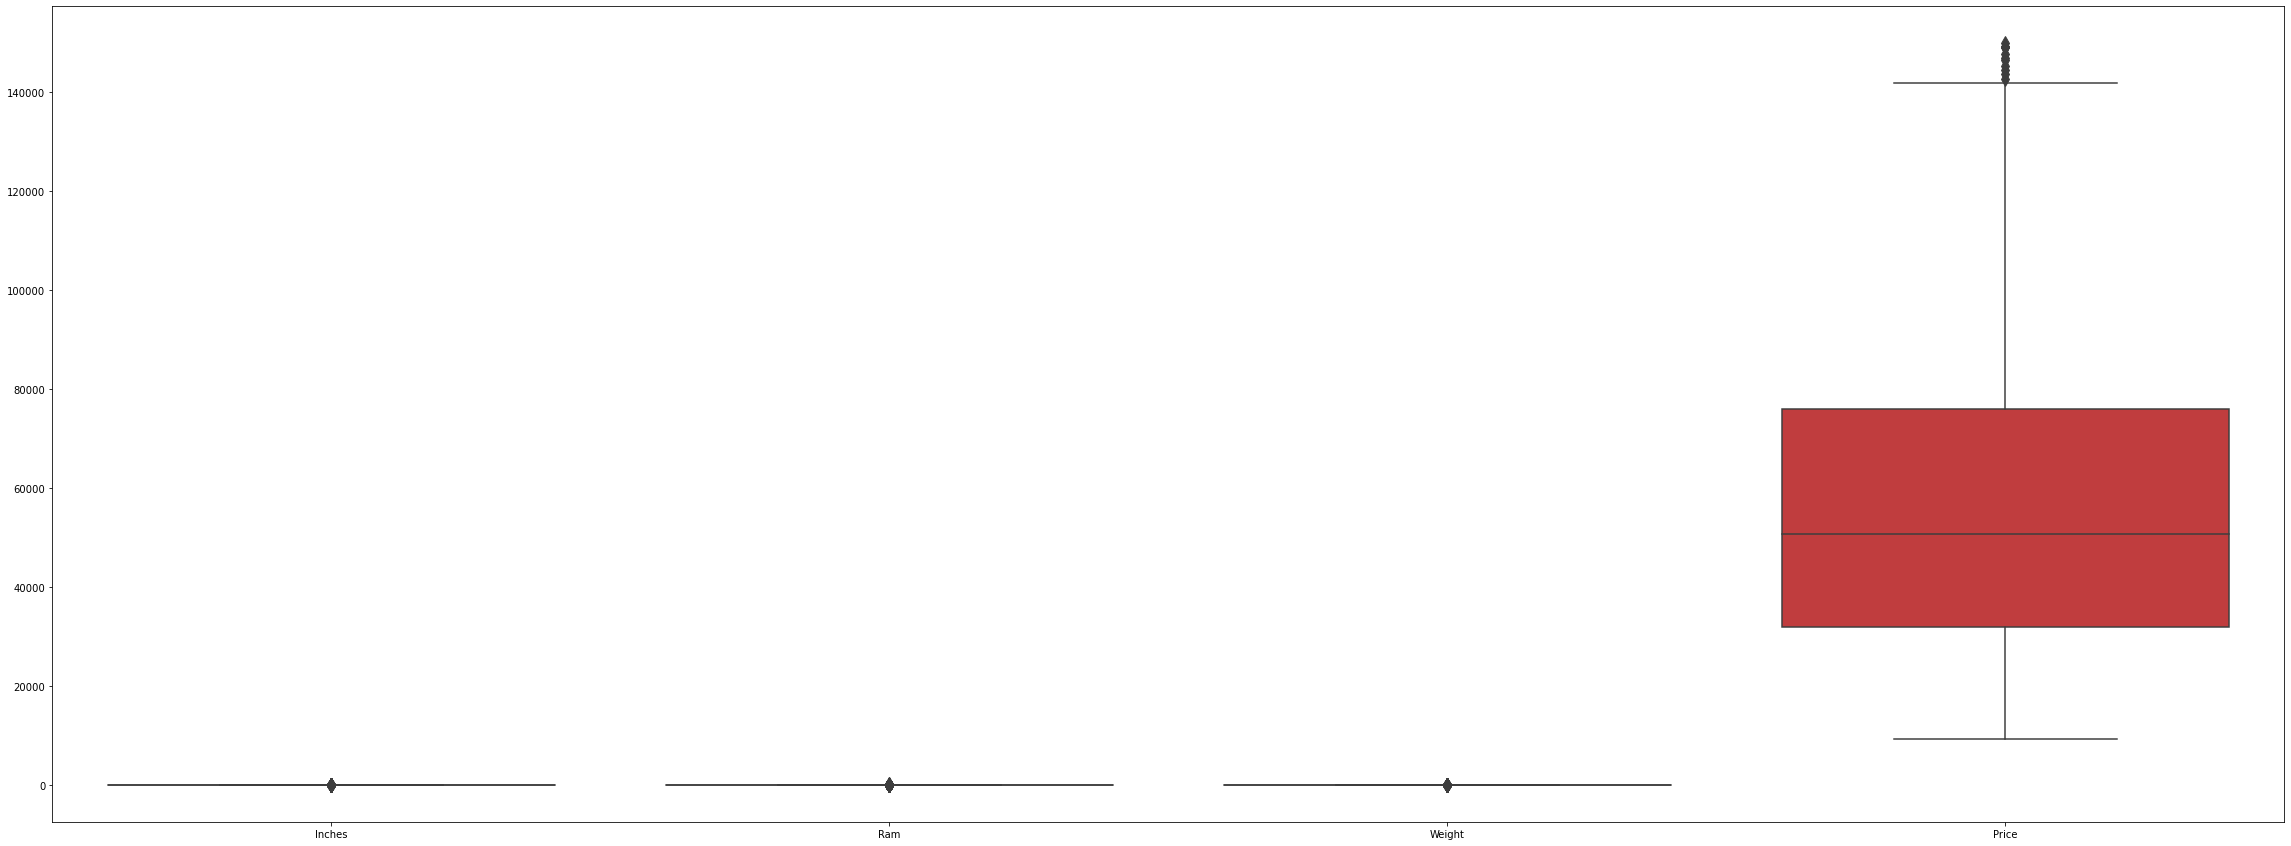

In [24]:
plt.figure(figsize=(40,15))
sns.boxplot(data=df3,fliersize=10)

In [25]:
numerical = [var for var in df3.columns if df3[var].dtype!='O']
numerical

['Inches', 'Ram', 'Weight', 'Price']

In [26]:
categorical = [var for var in df3.columns if df3[var].dtype=='O']
categorical

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [27]:
for var in categorical:

    print(var, ' contains ', len(df3[var].unique()), ' labels')

Company  contains  19  labels
TypeName  contains  6  labels
ScreenResolution  contains  40  labels
Cpu  contains  115  labels
Memory  contains  36  labels
Gpu  contains  102  labels
OpSys  contains  9  labels


In [28]:
data=df3.copy()

In [29]:
#data1 = pd.concat([pd.get_dummies(df4.Company , drop_first=True),
                 # pd.get_dummies(df4.TypeName, drop_first=True),
                 # pd.get_dummies(df4.ScreenResolution, drop_first=True),
                 # pd.get_dummies(df4.Cpu, drop_first=True),
                 # pd.get_dummies(df4.Memory, drop_first=True),
                 # pd.get_dummies(df4.Gpu, drop_first=True),
                 # pd.get_dummies(df4.OpSys, drop_first=True),
                 # df4[numerical]], axis=1)
#data1

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Company']=encoder.fit_transform(data['Company'])
data['TypeName']=encoder.fit_transform(data['TypeName'])
data['ScreenResolution']=encoder.fit_transform(data['ScreenResolution'])
data['Cpu']=encoder.fit_transform(data['Cpu'])
#newdf['Ram']=encoder.fit_transform(newdf['Ram'])
data['Memory']=encoder.fit_transform(data['Memory'])
data['Gpu']=encoder.fit_transform(data['Gpu'])
data['OpSys']=encoder.fit_transform(data['OpSys'])

In [31]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8,4,56,8,1.37,71378.6832
1,1,4,13.3,1,63,8,2,49,8,1.34,47895.5232
2,7,3,15.6,8,74,8,14,51,4,1.86,30636.0000
3,1,4,15.4,25,85,16,27,8,8,1.83,135195.3360
4,1,4,13.3,23,67,8,14,57,8,1.37,96095.8080


In [32]:
x=data.drop('Price',axis=1)
y=data['Price']

In [33]:
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x)
#x_test=mms.transform(x_test)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
#x_test = pd.DataFrame(x_test, columns=x.columns)
x_scaled.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,0.055556,0.8,0.125490,0.589744,0.570175,0.111111,0.114286,0.554455,1.0,0.123408
1,0.055556,0.8,0.125490,0.025641,0.552632,0.111111,0.057143,0.485149,1.0,0.120705
2,0.388889,0.6,0.215686,0.205128,0.649123,0.111111,0.400000,0.504950,0.5,0.167553
3,0.055556,0.8,0.207843,0.641026,0.745614,0.238095,0.771429,0.079208,1.0,0.164850
4,0.055556,0.8,0.125490,0.589744,0.587719,0.111111,0.400000,0.564356,1.0,0.123408


In [34]:
y_scaled=mms.fit_transform(np.array(y).reshape(-1,1)).flatten()
y_scaled.shape

(1242,)

In [35]:
#from sklearn.feature_selection import SelectKBest, f_regression
#from sklearn.feature_selection import SelectPercentile , f_regression
#select_percentile=SelectPercentile(score_func=f_regression,percentile=100)
#x_new=select_percentile.fit_transform(x_scaled,y)
#print(x_new.shape)
#print(x.columns[select_percentile.get_support()].tolist())
#x=x_new

In [36]:
x_train,x_test,y_train,y_test=train_test_split( x_scaled , y_scaled ,test_size=0.2 , random_state=0)

In [37]:
x_train.shape, x_test.shape

((993, 10), (249, 10))

In [38]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
svm=SVR()
xgb=XGBRegressor()
adab=AdaBoostRegressor()
class_list=[lr, dt,rf,svm,xgb,adab]
for model in class_list:
        start = time.time()
        grid = GridSearchCV(estimator=model, param_grid={}, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1,verbose=3)
        grid.fit(x_train, y_train)
        end = time.time()
        print(model, '\n', -grid.best_score_,'\n', round(end-start),grid.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
LinearRegression() 
 0.14416206186362296 
 2 LinearRegression()
Fitting 5 folds for each of 1 candidates, totalling 5 fits
DecisionTreeRegressor() 
 0.12485167766909122 
 1 DecisionTreeRegressor()
Fitting 5 folds for each of 1 candidates, totalling 5 fits
RandomForestRegressor() 
 0.09341707944516256 
 2 RandomForestRegressor()
Fitting 5 folds for each of 1 candidates, totalling 5 fits
SVR() 
 0.11850299022170137 
 0 SVR()
Fitting 5 folds for each of 1 candidates, totalling 5 fits
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, ma

In [39]:
from sklearn.feature_selection import RFE,RFECV
rf=XGBRegressor()
rfe=RFECV(estimator=rf,step=20)
rfe=rfe.fit(x_train,y_train)
final_predict=rfe.predict(x_test)

print(rfe.n_features_)
mae = mean_absolute_error(y_test, final_predict)
mse = mean_squared_error(y_test, final_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predict)

print('mean_absolute_error =',mae)
print('mean_squared_error =',mse)
print('root_mean_squared_error =',rmse)
print('accuracy =',r2)
#select_percentile=SelectPercentile(score_func=f_regression,percentile=100)
#x_new=select_percentile.fit_transform(x_scaled,y)
#print(x_new.shape)
#print(x.columns[select_percentile.get_support()].tolist())
#x=x_new



10
mean_absolute_error = 0.06499587539410107
mean_squared_error = 0.008903128717463507
root_mean_squared_error = 0.09435639203288512
accuracy = 0.8416865011519468


In [40]:
y_pred_original=mms.inverse_transform(final_predict.reshape(-1, 1)).flatten()
y_test_original=mms.inverse_transform(y_test.reshape(-1, 1)).flatten()

for i in range(5):
    print(f"predicted: {y_pred_original[i]:.2f} , Actual: {y_test_original[i]:.2f}")

predicted: 48948.46 , Actual: 32767.20
predicted: 37268.27 , Actual: 34045.39
predicted: 73565.87 , Actual: 53274.67
predicted: 94742.34 , Actual: 95371.20
predicted: 75399.34 , Actual: 52161.12


In [41]:
np.mean(y_test)


0.360037349892039

In [42]:
np.mean(final_predict)

0.358006

In [43]:
model=LinearRegression()
model.fit(x_train,y_train)
final_predict=model.predict(x_test)


#cv_lr=GridSearchCV(model,param_grid={},scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
#model.fit(x_train,y_train)
#cv_lr.fit(x_train, y_train)

# Get the best estimator
#best_lr = cv_lr.best_estimator_
#final_predict=model.predict(x_test)
#final_predict = best_lr.predict(x_test)
#submission = pd.DataFrame( {'SalePrice': final_predict})
#print(submission)


mae = mean_absolute_error(y_test, final_predict)
mse = mean_squared_error(y_test, final_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predict)

print('mean_absolute_error =',mae)
print('mean_squared_error =',mse)
print('root_mean_squared_error =',rmse)
print('accuracy =',r2)

mean_absolute_error = 0.11285884356901853
mean_squared_error = 0.025156249120672866
root_mean_squared_error = 0.15860721648359152
accuracy = 0.5526770484206123


In [44]:
y_pred_original=mms.inverse_transform(final_predict.reshape(-1, 1)).flatten()
y_test_original=mms.inverse_transform(y_test.reshape(-1, 1)).flatten()

for i in range(5):
    print(f"predicted: {y_pred_original[i]:.2f} , Actual: {y_test_original[i]:.2f}")

predicted: 50684.67 , Actual: 32767.20
predicted: 43010.66 , Actual: 34045.39
predicted: 70998.76 , Actual: 53274.67
predicted: 75157.77 , Actual: 95371.20
predicted: 59786.04 , Actual: 52161.12


In [45]:
model=RandomForestRegressor(max_depth=25) 
model.fit(x_train,y_train)
final_predict=model.predict(x_test)
#submission = pd.DataFrame( {'SalePrice': final_predict})
#submission
#cv_rf=GridSearchCV(model,param_grid={},scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
#model.fit(x_train,y_train)
#cv_rf.fit(x_train, y_train)

# Get the best estimator
#best_rf = cv_rf.best_estimator_
#final_predict=model.predict(x_test)
#final_predict = best_rf.predict(x_test)
#submission = pd.DataFrame( {'SalePrice': final_predict})
#print(submission)

mae = mean_absolute_error(y_test, final_predict)
mse = mean_squared_error(y_test, final_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predict)

print('mean_absolute_error =',mae)
print('mean_squared_error =',mse)
print('root_mean_squared_error =',rmse)
print('accuracy =',r2)

mean_absolute_error = 0.06586200213786565
mean_squared_error = 0.009234077476281959
root_mean_squared_error = 0.09609410739624963
accuracy = 0.8358016422882083


In [46]:
y_pred_original=mms.inverse_transform(final_predict.reshape(-1, 1)).flatten()
y_test_original=mms.inverse_transform(y_test.reshape(-1, 1)).flatten()

for i in range(5):
    print(f"predicted: {y_pred_original[i]:.2f} , Actual: {y_test_original[i]:.2f}")

predicted: 43630.49 , Actual: 32767.20
predicted: 39924.09 , Actual: 34045.39
predicted: 62457.93 , Actual: 53274.67
predicted: 93403.24 , Actual: 95371.20
predicted: 76582.49 , Actual: 52161.12


In [47]:
#scores=cross_val_score(model,x,y,cv=6)
#np.mean(scores)

In [48]:
model=DecisionTreeRegressor(max_depth=20)
model.fit(x_train,y_train)
final_predict=model.predict(x_test)

#cv_dt=GridSearchCV(model,param_grid={},scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
#model.fit(x_train,y_train)
#cv_dt.fit(x_train, y_train)

# Get the best estimator
#best_dt = cv_dt.best_estimator_
#final_predict=model.predict(x_test)
#final_predict = best_dt.predict(x_test)
#submission = pd.DataFrame( {'SalePrice': final_predict})
#submission


mae = mean_absolute_error(y_test, final_predict)
mse = mean_squared_error(y_test, final_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predict)

print('mean_absolute_error =',mae)
print('mean_squared_error =',mse)
print('root_mean_squared_error =',rmse)
print('accuracy =',r2)

mean_absolute_error = 0.08323068452108143
mean_squared_error = 0.014675631357151747
root_mean_squared_error = 0.1211430202576762
accuracy = 0.739041114457029


In [49]:
y_pred_original=mms.inverse_transform(final_predict.reshape(-1, 1)).flatten()
y_test_original=mms.inverse_transform(y_test.reshape(-1, 1)).flatten()

for i in range(5):
    print(f"predicted: {y_pred_original[i]:.2f} , Actual: {y_test_original[i]:.2f}")

predicted: 41292.00 , Actual: 32767.20
predicted: 41771.52 , Actual: 34045.39
predicted: 49816.80 , Actual: 53274.67
predicted: 121584.96 , Actual: 95371.20
predicted: 85194.72 , Actual: 52161.12


In [50]:
model=AdaBoostRegressor()
model.fit(x_train,y_train)
final_predict=model.predict(x_test)

#cv_adaboost=GridSearchCV(model,param_grid={},scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
#model.fit(x_train,y_train)
#cv_adaboost.fit(x_train, y_train)

# Get the best estimator
#best_adaboost = cv_adaboost.best_estimator_
#final_predict=model.predict(x_test)
#final_predict = best_adaboost.predict(x_test)
#submission = pd.DataFrame( {'SalePrice': final_predict})
#print(submission)

mae = mean_absolute_error(y_test, final_predict)
mse = mean_squared_error(y_test, final_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predict)

print('mean_absolute_error =',mae)
print('mean_squared_error =',mse)
print('root_mean_squared_error =',rmse)
print('accuracy =',r2)

mean_absolute_error = 0.11371373002106189
mean_squared_error = 0.0184149577534478
root_mean_squared_error = 0.13570172347265086
accuracy = 0.6725492256032457


In [51]:
y_pred_original=mms.inverse_transform(final_predict.reshape(-1, 1)).flatten()
y_test_original=mms.inverse_transform(y_test.reshape(-1, 1)).flatten()

for i in range(5):
    print(f"predicted: {y_pred_original[i]:.2f} , Actual: {y_test_original[i]:.2f}")

predicted: 55498.34 , Actual: 32767.20
predicted: 53157.45 , Actual: 34045.39
predicted: 78985.25 , Actual: 53274.67
predicted: 91926.84 , Actual: 95371.20
predicted: 78985.25 , Actual: 52161.12


In [52]:
model=SVR()
model.fit(x_train,y_train)
final_predict=model.predict(x_test)

#cv_svr=GridSearchCV(model,param_grid={},scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
#model.fit(x_train,y_train)
#cv_svr.fit(x_train, y_train)

# Get the best estimator
#best_svr = cv_svr.best_estimator_
#final_predict=model.predict(x_test)
#final_predict = best_svr.predict(x_test)
#submission = pd.DataFrame( {'SalePrice': final_predict})
#print(submission)

mae = mean_absolute_error(y_test, final_predict)
mse = mean_squared_error(y_test, final_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predict)

print('mean_absolute_error =',mae)
print('mean_squared_error =',mse)
print('root_mean_squared_error =',rmse)
print('accuracy =',r2)

mean_absolute_error = 0.09131984132139416
mean_squared_error = 0.014078798781660266
root_mean_squared_error = 0.11865411405282274
accuracy = 0.7496538615317978


In [53]:
y_pred_original=mms.inverse_transform(final_predict.reshape(-1, 1)).flatten()
y_test_original=mms.inverse_transform(y_test.reshape(-1, 1)).flatten()

for i in range(5):
    print(f"predicted: {y_pred_original[i]:.2f} , Actual: {y_test_original[i]:.2f}")

predicted: 52418.71 , Actual: 32767.20
predicted: 34473.30 , Actual: 34045.39
predicted: 52421.27 , Actual: 53274.67
predicted: 90516.15 , Actual: 95371.20
predicted: 67008.87 , Actual: 52161.12


In [54]:
model=Sequential()
model.add(Dense(64,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error') 
model.fit(x_train,y_train,epochs=150,batch_size=32,verbose=1,validation_split=0.2)          

Epoch 1/150
25/25 [==============================] - 2s 13ms/step - loss: 0.0815 - val_loss: 0.0439
Epoch 2/150
25/25 [==============================] - 0s 4ms/step - loss: 0.0426 - val_loss: 0.0365
Epoch 3/150
25/25 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.0315
Epoch 4/150
25/25 [==============================] - 0s 4ms/step - loss: 0.0317 - val_loss: 0.0288
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0294 - val_loss: 0.0246
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.0233
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0221
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0203 - val_loss: 0.0207
Epoch 10/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.0210
Epoch 11

25/25 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0187
Epoch 84/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0178
Epoch 85/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0169
Epoch 86/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0168
Epoch 87/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0175
Epoch 88/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0206
Epoch 89/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0187
Epoch 90/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0177
Epoch 91/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0183
Epoch 92/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0183
Epoch 93/150


In [55]:
final_predict=model.predict(x_test)
print(final_predict.shape)
print(x_test.shape)

8/8 [==============================] - 0s 1ms/step
(249, 1)
(249, 10)


In [56]:
mse=mean_squared_error(y_test,final_predict)
print(mse)
y_pred_original=mms.inverse_transform(final_predict.reshape(-1, 1)).flatten()
y_test_original=mms.inverse_transform(y_test.reshape(-1, 1)).flatten()

for i in range(5):
    print(f"predicted: {y_pred_original[i]:.2f} , Actual: {y_test_original[i]:.2f}")

0.02195557453014802
predicted: 71814.91 , Actual: 32767.20
predicted: 44331.48 , Actual: 34045.39
predicted: 65821.06 , Actual: 53274.67
predicted: 124631.47 , Actual: 95371.20
predicted: 74806.59 , Actual: 52161.12
